In [1]:
%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.visualization import *
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout, plot_state_city
from qiskit.tools.jupyter import *
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
import numpy as np
import math
provider = IBMQ.load_account()


In [2]:
backend = provider.get_backend('ibmq_qasm_simulator')

## Code 1: Bits mirroring

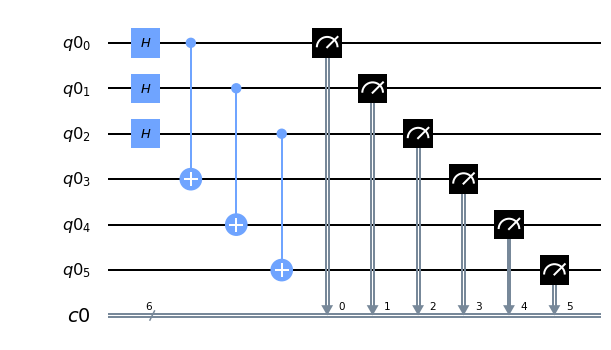

In [3]:
q = QuantumRegister(6)     
c = ClassicalRegister(6) 
qc = QuantumCircuit(q, c) 

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.cx(q[0],q[3])
qc.cx(q[1],q[4])
qc.cx(q[2],q[5])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.measure(q[3],c[3])
qc.measure(q[4],c[4])
qc.measure(q[5],c[5])


qc.draw(output='mpl')

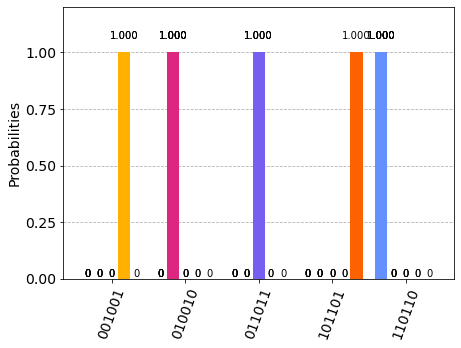

In [4]:
counts = []
for i in range(5):
    job = execute(qc, backend=backend, shots=1)
    result = job.result()
    counts.append(result.get_counts(qc))
plot_histogram(counts)

## Code 2: Bits anti-mirror

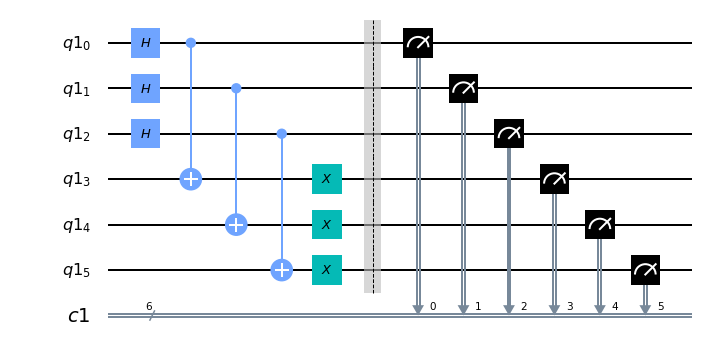

In [5]:
q = QuantumRegister(6)     
c = ClassicalRegister(6) 
qc1 = QuantumCircuit(q, c) 

qc1.h(q[0])
qc1.h(q[1])
qc1.h(q[2])
qc1.cx(q[0],q[3])

qc1.x(q[3])
qc1.cx(q[1],q[4])
qc1.x(q[4])
qc1.cx(q[2],q[5])
qc1.x(q[5])
qc1.barrier()
qc1.measure(q[0],c[0])
qc1.measure(q[1],c[1])
qc1.measure(q[2],c[2])
qc1.measure(q[3],c[3])
qc1.measure(q[4],c[4])
qc1.measure(q[5],c[5])


qc1.draw(output='mpl')

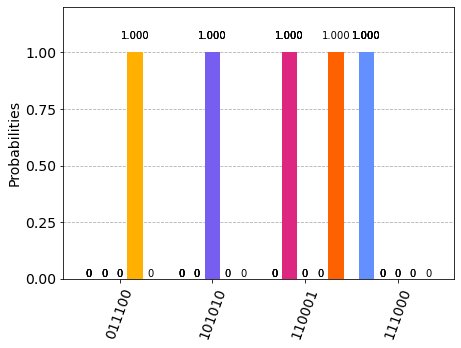

In [6]:
counts = []
for i in range(5):
    job = execute(qc1, backend=backend, shots=1)
    result = job.result()
    counts.append(result.get_counts(qc1))
plot_histogram(counts)

## Code 3: Die teleporting

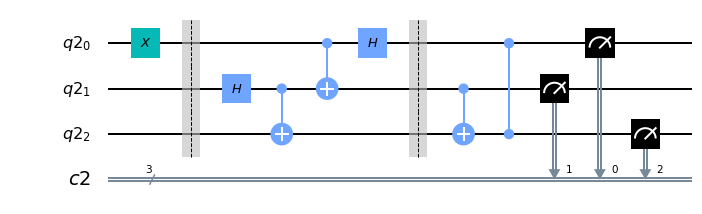

In [7]:
q = QuantumRegister(3)     
c = ClassicalRegister(3) 
qc2 = QuantumCircuit(q, c) 

qc2.x(q[0])
# qc2.h(q[0])
# qc2.h(q[1])
# qc2.toffoli(q[0],q[1],q[2])
qc2.barrier()
qc2.h(q[1])
qc2.cx(q[1],q[2])
qc2.cx(q[0],q[1])
qc2.h(q[0])
qc2.barrier()


#qc2.measure(q[1],c[1])

qc2.cx(q[1],q[2])
qc2.cz(q[0],q[2])
# qc2.measure(q[0],c[0])
qc2.measure(q[0],c[0])
qc2.measure(q[1],c[1])
qc2.measure(q[2],c[2])

qc2.draw(output='mpl')

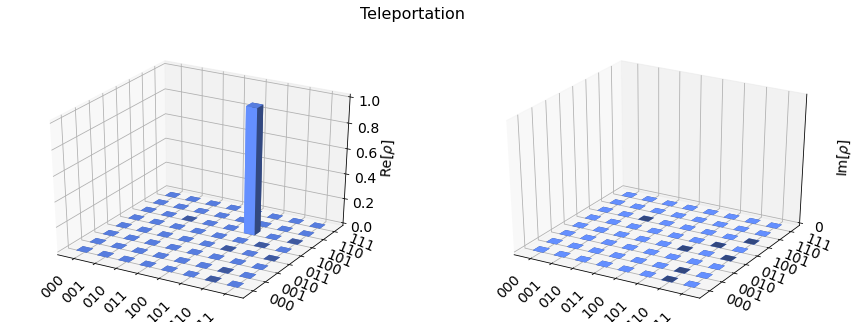

In [8]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc2, simulator).result()
statevector = result.get_statevector(qc2)
plot_state_city(statevector, title='Teleportation')

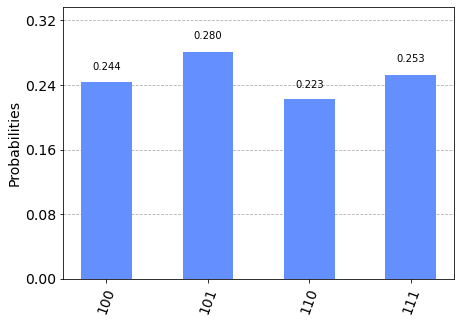

In [11]:
job = execute(qc2, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts(qc2)
plot_histogram(counts)

In [13]:
def decimalToBinary(n):  
    return format(n, '03b')



<BarContainer object of 8 artists>

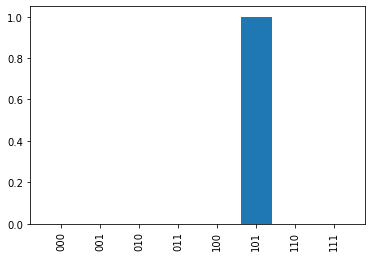

In [14]:
A = (abs(statevector))
bin_var = []
for i in range(len(A)):
    bin_var.append(decimalToBinary(i))
plt.xticks(rotation=90)
plt.bar(bin_var,A)